# Importing Data

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
train_path = "/content/drive/MyDrive/RNN/train.csv"
actual_path = "/content/drive/MyDrive/RNN/Predict_Jan.csv"
test_path = "/content/drive/MyDrive/RNN/Test_Jan.csv"

In [31]:
import pandas as pd
train = pd.read_csv(train_path,
                 parse_dates=["datetime"],
                 index_col=["datetime"])
train.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43775 entries, 2015-03-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  43775 non-null  float64
 1   T2M_toc     43775 non-null  float64
 2   QV2M_toc    43775 non-null  float64
 3   TQL_toc     43775 non-null  float64
 4   W2M_toc     43775 non-null  float64
 5   T2M_san     43775 non-null  float64
 6   QV2M_san    43775 non-null  float64
 7   TQL_san     43775 non-null  float64
 8   W2M_san     43775 non-null  float64
 9   T2M_dav     43775 non-null  float64
 10  QV2M_dav    43775 non-null  float64
 11  TQL_dav     43775 non-null  float64
 12  W2M_dav     43775 non-null  float64
 13  Holiday_ID  43775 non-null  int64  
 14  holiday     43775 non-null  int64  
 15  school      43775 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 5.7 MB


In [33]:
train.isna().sum()

nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [34]:
actual_predict = pd.read_csv(actual_path,
                 parse_dates=["datetime"],
                 index_col=["datetime"])
actual_predict.head()

,nat_demand
datetime,
2020-01-01 00:00:00,1032.2630
2020-01-01 01:00:00,1017.5806
2020-01-01 02:00:00,1000.2797
2020-01-01 03:00:00,987.2383
2020-01-01 04:00:00,970.3667


In [35]:
actual_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2020-01-01 00:00:00 to 2020-01-31 23:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  744 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [36]:
test = pd.read_csv(test_path,
                   parse_dates=["datetime"],
                   index_col=["datetime"])

test = pd.merge(test, actual_predict, on='datetime', how='inner')
test['nat_demand'] = test['nat_demand_y']
test = test.drop(['nat_demand_x', 'nat_demand_y'], axis=1)
test = test[train.columns]
test.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1032.2630,25.809259,0.018042,0.032806,14.849625,23.301447,0.017035,0.021866,4.559083,22.598322,0.016195,0.068054,3.737708,1,1,0
2020-01-01 01:00:00,1017.5806,25.650842,0.018065,0.053177,15.933757,23.041467,0.016936,0.023796,4.846412,22.471155,0.016104,0.080109,3.591759,1,1,0
2020-01-01 02:00:00,1000.2797,25.501489,0.018119,0.069000,16.806818,22.806177,0.016822,0.024910,5.204608,22.368677,0.016013,0.094757,3.704177,1,1,0
2020-01-01 03:00:00,987.2383,25.430994,0.018142,0.080017,17.460632,22.657556,0.016746,0.025208,5.628076,22.282556,0.015937,0.107086,3.936592,1,1,0
2020-01-01 04:00:00,970.3667,25.360132,0.018204,0.084137,16.632112,22.539819,0.016647,0.022789,5.729821,22.203882,0.015862,0.113800,4.088643,1,1,0


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2020-01-01 00:00:00 to 2020-01-31 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  744 non-null    float64
 1   T2M_toc     744 non-null    float64
 2   QV2M_toc    744 non-null    float64
 3   TQL_toc     744 non-null    float64
 4   W2M_toc     744 non-null    float64
 5   T2M_san     744 non-null    float64
 6   QV2M_san    744 non-null    float64
 7   TQL_san     744 non-null    float64
 8   W2M_san     744 non-null    float64
 9   T2M_dav     744 non-null    float64
 10  QV2M_dav    744 non-null    float64
 11  TQL_dav     744 non-null    float64
 12  W2M_dav     744 non-null    float64
 13  Holiday_ID  744 non-null    int64  
 14  holiday     744 non-null    int64  
 15  school      744 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 98.8 KB


# Visualization

In [38]:
import csv
from datetime import datetime

timesteps_train = []
nat_demand_train = []
with open(train_path, "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps_train.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
    nat_demand_train.append(float(line[1]))

# View first 10 of each
timesteps_train[:10], nat_demand_train[:10]

([datetime.datetime(2015, 1, 3, 1, 0),
  datetime.datetime(2015, 1, 3, 2, 0),
  datetime.datetime(2015, 1, 3, 3, 0),
  datetime.datetime(2015, 1, 3, 4, 0),
  datetime.datetime(2015, 1, 3, 5, 0),
  datetime.datetime(2015, 1, 3, 6, 0),
  datetime.datetime(2015, 1, 3, 7, 0),
  datetime.datetime(2015, 1, 3, 8, 0),
  datetime.datetime(2015, 1, 3, 9, 0),
  datetime.datetime(2015, 1, 3, 10, 0)],
 [970.345,
  912.1755,
  900.2688,
  889.9538,
  893.6865,
  879.2323,
  932.4876,
  1048.972,
  1167.9074,
  1257.5069])

In [39]:
timesteps_test = []
nat_demand_test = []
with open(actual_path, "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps_test.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
    nat_demand_test.append(float(line[1]))

# View first 10 of each
timesteps_test[:10], nat_demand_test[:10]

([datetime.datetime(2020, 1, 1, 0, 0),
  datetime.datetime(2020, 1, 1, 1, 0),
  datetime.datetime(2020, 1, 1, 2, 0),
  datetime.datetime(2020, 1, 1, 3, 0),
  datetime.datetime(2020, 1, 1, 4, 0),
  datetime.datetime(2020, 1, 1, 5, 0),
  datetime.datetime(2020, 1, 1, 6, 0),
  datetime.datetime(2020, 1, 1, 7, 0),
  datetime.datetime(2020, 1, 1, 8, 0),
  datetime.datetime(2020, 1, 1, 9, 0)],
 [1032.263,
  1017.5806,
  1000.2797,
  987.2383,
  970.3667,
  957.6767,
  922.3729,
  924.4692,
  954.3947,
  986.0648])

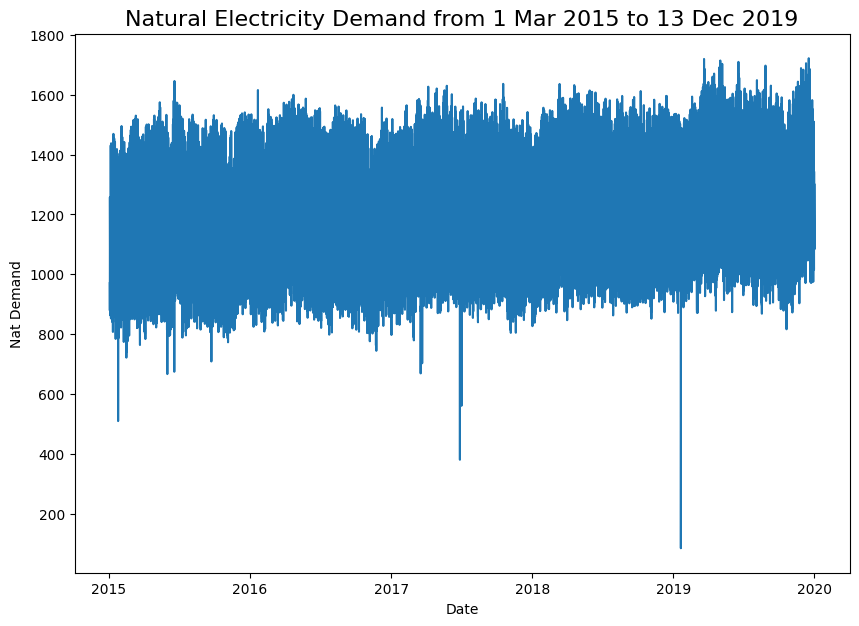

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps_train, nat_demand_train)
plt.title("Natural Electricity Demand from 1 Mar 2015 to 13 Dec 2019", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Nat Demand");

In [41]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Nat Demand")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [42]:
train.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000
mean,1184.102195,27.381070,0.018372,0.082358,13.018476,26.869752,0.017909,0.109571,6.934124,24.678938,0.016912,0.148480,3.562928,0.730828,0.062501,0.739600
std,193.512875,1.652179,0.001587,0.065835,7.151448,2.960669,0.001853,0.086249,4.055238,2.374089,0.001566,0.088259,1.709116,3.244740,0.242067,0.438858
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010385,0.000009,0.060431,19.933740,0.009655,0.000051,0.015497,0.000000,0.000000,0.000000
25%,1017.453350,26.168436,0.017337,0.028423,7.387169,24.767938,0.016707,0.040314,3.912895,22.951654,0.015867,0.079285,2.301747,0.000000,0.000000,0.000000
50%,1173.251500,27.109338,0.018670,0.068237,11.767408,26.141260,0.018418,0.089752,5.888003,23.981989,0.017224,0.134277,3.408653,0.000000,0.000000,1.000000
75%,1332.279950,28.521463,0.019549,0.120148,18.038599,28.642450,0.019265,0.161377,9.151058,26.174570,0.018092,0.204773,4.652970,0.000000,0.000000,1.000000
max,1721.515700,35.039575,0.022690,0.521240,39.229726,39.063440,0.022011,0.484985,24.483937,34.216211,0.020958,0.477783,10.288902,22.000000,1.000000,1.000000


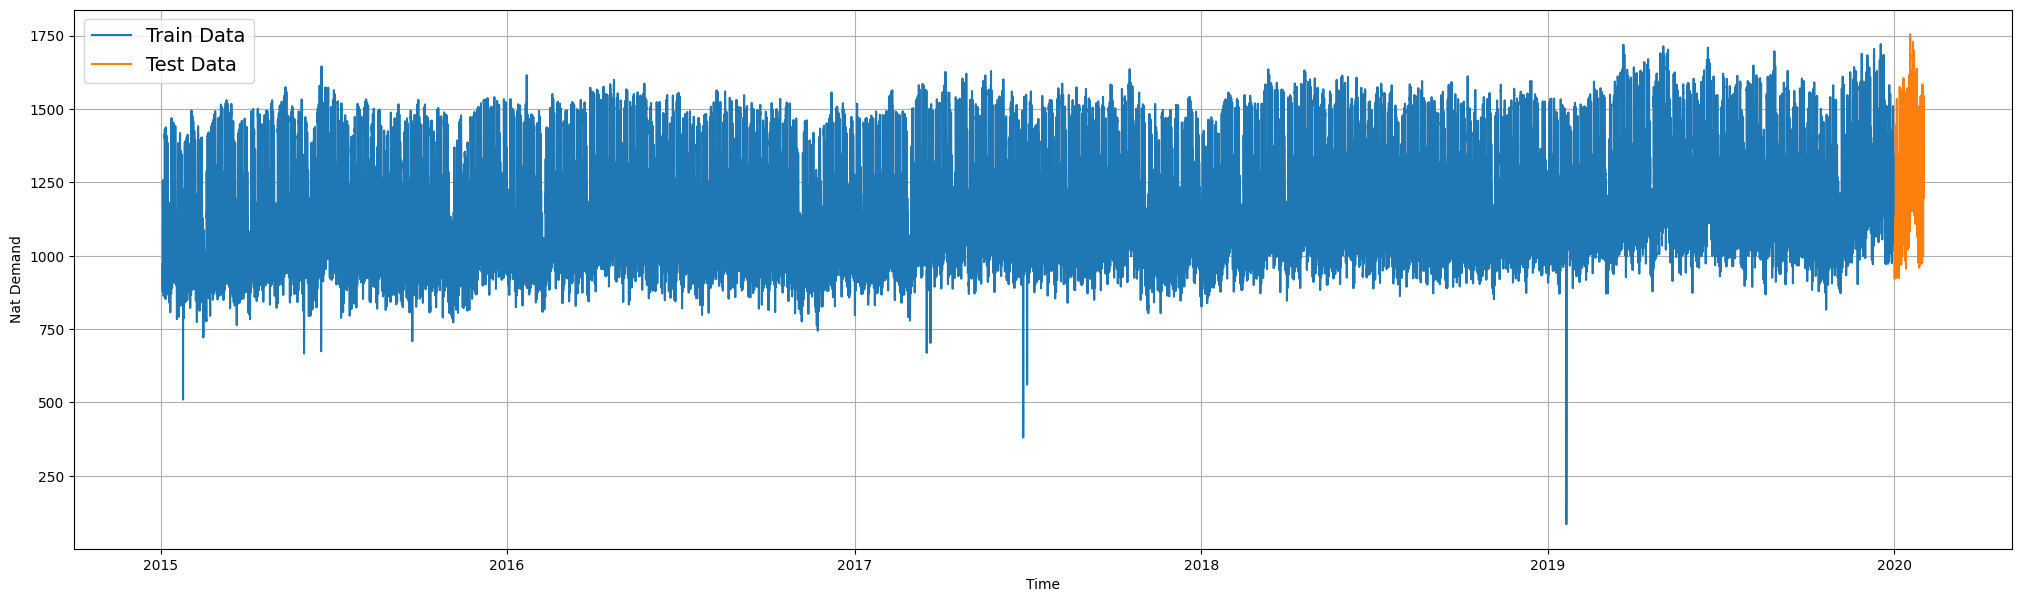

In [43]:
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_train, values=nat_demand_train, format='-', label="Train Data")
plot_time_series(timesteps=timesteps_test, values=nat_demand_test, format='-', label="Test Data")

In [44]:
train.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

# Preprocessing

In [45]:
features = ['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav', 'holiday', 'school']
target = 'nat_demand'

**lag features**

In [46]:
for i in range(1, 8):
    train[f'{target}_lag_{i}'] = train[target].shift(i)
    test[f'{target}_lag_{i}'] = test[target].shift(i)

test.dropna(inplace=True)
train.dropna(inplace=True)

In [47]:
# train.head(2)

In [48]:
test.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,Holiday_ID,holiday,school,nat_demand_lag_1,nat_demand_lag_2,nat_demand_lag_3,nat_demand_lag_4,nat_demand_lag_5,nat_demand_lag_6,nat_demand_lag_7
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:00:00,924.4692,26.073602,0.018570,0.079956,16.127368,23.831415,0.016922,0.015656,8.454858,22.417352,...,1,1,0,922.3729,957.6767,970.3667,987.2383,1000.2797,1017.5806,1032.2630
2020-01-01 08:00:00,954.3947,26.938074,0.018493,0.102783,20.179076,25.461511,0.017341,0.016876,9.816476,23.172449,...,1,1,0,924.4692,922.3729,957.6767,970.3667,987.2383,1000.2797,1017.5806
2020-01-01 09:00:00,986.0648,27.672021,0.018401,0.105927,22.823427,26.953271,0.017470,0.014187,11.696469,24.250146,...,1,1,0,954.3947,924.4692,922.3729,957.6767,970.3667,987.2383,1000.2797
2020-01-01 10:00:00,989.1948,28.329095,0.018401,0.113586,24.016658,28.063470,0.017562,0.012226,12.490295,25.438470,...,1,1,0,986.0648,954.3947,924.4692,922.3729,957.6767,970.3667,987.2383
2020-01-01 11:00:00,1005.6986,28.846826,0.018485,0.127563,24.473000,28.706201,0.017584,0.013699,12.599918,26.393701,...,1,1,0,989.1948,986.0648,954.3947,924.4692,922.3729,957.6767,970.3667


**Scale the Data**

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'train' and 'test' are your dataframes and 'nat_demand' is a column to exclude from scaling
columns_to_scale = [col for col in train.columns if col != 'nat_demand']

# Create a scaler and fit it only on the columns to be scaled
scaler = MinMaxScaler()
scaler.fit(train[columns_to_scale])

# Transform the selected columns in both the train and test sets
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])

test_scaled = test.copy()
test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [50]:
def prepare_data_with_window(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [51]:
# Define window size and forecast horizon
n_steps_in = 7  # Window size
n_steps_out = 1  # Forecast horizon

# Prepare data for GRU
X_train, y_train = prepare_data_with_window(train_scaled.values, n_steps_in, n_steps_out)
X_test, y_test = prepare_data_with_window(test_scaled.values, n_steps_in, n_steps_out)

In [52]:
# Reshape input for GRU [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Model

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam

In [54]:
epoch = 10
lr = 0.0001
batch_size = 64
layer_unit = 50

In [55]:
tf.random.set_seed(42)

In [56]:
# Build GRU model
model = Sequential()
model.add(GRU(layer_unit, activation='relu', input_shape=(n_steps_in, X_train.shape[2]), return_sequences=True))
model.add(GRU(layer_unit, activation='relu', return_sequences=True))
model.add(GRU(layer_unit, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_steps_out))
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 7, 50)             11250     
                                                                 
 gru_4 (GRU)                 (None, 7, 50)             15300     
                                                                 
 gru_5 (GRU)                 (None, 50)                15300     
                                                                 
 dense_2 (Dense)             (None, 64)                3264      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45179 (176.48 KB)
Trainable params: 45179 (176.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Train the model
model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
684/684 [==============================] - 36s 47ms/step - loss: 314191.5625
Epoch 2/10
684/684 [==============================] - 34s 50ms/step - loss: 2854.9260
Epoch 3/10
684/684 [==============================] - 33s 49ms/step - loss: 2186.2629
Epoch 4/10
684/684 [==============================] - 33s 49ms/step - loss: 1941.2313
Epoch 5/10
684/684 [==============================] - 32s 47ms/step - loss: 1689.8192
Epoch 6/10
684/684 [==============================] - 32s 47ms/step - loss: 1531.1370
Epoch 7/10
684/684 [==============================] - 31s 46ms/step - loss: 1565.3787
Epoch 8/10
684/684 [==============================] - 32s 46ms/step - loss: 1407.4266
Epoch 9/10
684/684 [==============================] - 32s 46ms/step - loss: 1366.9779
Epoch 10/10
23/23 [==============================] - 1s 6ms/step


In [58]:
# Calculate RMSE for the entire horizon
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) for Horizon {n_steps_out}: {rmse}')

Root Mean Squared Error (RMSE) for Horizon 1: 41.078300027001795


In [59]:
len(y_pred), len(y_test)

(730, 730)

# Evaluate

In [60]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 1s 7ms/step - loss: 1687.4268


1687.4267578125

In [61]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [62]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [63]:
results = evaluate_preds(y_true=y_test.flatten(),
                         y_pred=y_pred.flatten())

# model_forecast = y_test[:-1]
# model_forecast[:10], model_forecast[-10:] # View frist 10 and last 10
results

{'mae': 29.95539,
 'mse': 1687.4269,
 'rmse': 41.0783,
 'mape': 2.3146658,
 'mase': 0.6420501}

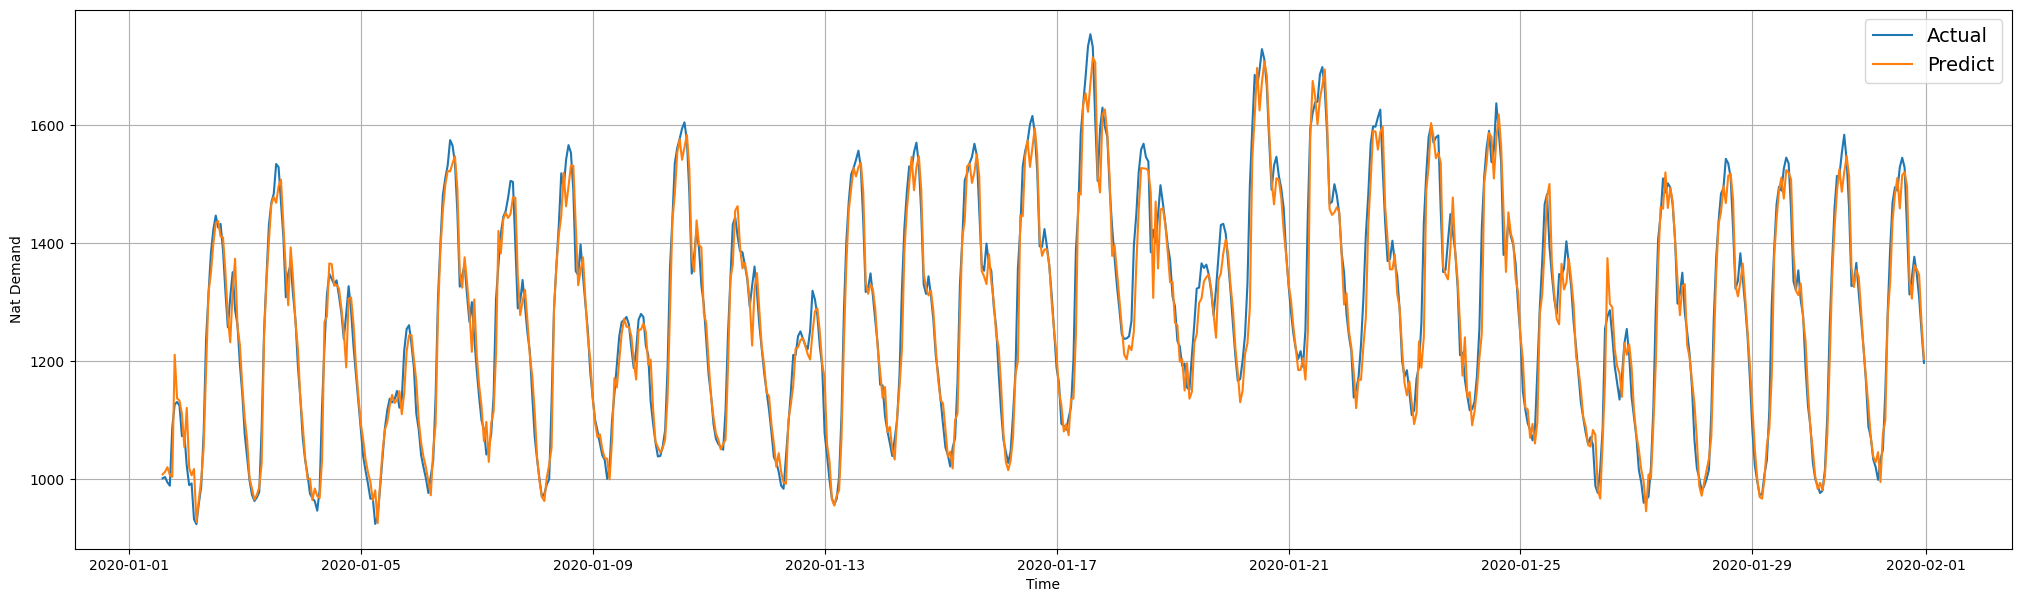

In [64]:
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_test.flatten(), format='-', label="Actual")
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_pred.flatten(), format='-', label="Predict")

In [65]:
# tf.random.set_seed(42)

# # Make multivariate time series model
# model_6 = tf.keras.Sequential([
#   layers.Dense(128, activation="relu"),
#   # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
#   layers.Dense(HORIZON)
# ], name="model_6_dense_multivariate")

# # Compile
# model_6.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# # Fit
# model_6.fit(X_train, y_train,
#             epochs=100,
#             batch_size=128,
#             verbose=0, # only print 1 line per epoch
#             validation_data=(X_test, y_test),
#             callbacks=[create_model_checkpoint(model_name=model_6.name)])